In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install koreanize-matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 60.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

In [ ]:
path = '/content/drive/MyDrive/Epoch 공모전/2020_2023_최종데이터.csv'
df = pd.read_csv(path)

In [ ]:
df.drop(['tm_dt'], axis=1, inplace=True)

In [ ]:
# 2. 범주형 변수 인코딩
df = pd.get_dummies(df, columns=["address_city", "address_gu", "sub_address"])

# 3. X, y 분리
X = df.drop("call_count", axis=1)
y = df["call_count"]

In [ ]:
X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X = df.drop('call_count', axis=1)
y = df['call_count']

In [ ]:
model = GradientBoostingRegressor(random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # 🔧 여기 수정

print(f"MAE: {mae:.4f}, RMSE: {rmse:.4f}")

MAE: 0.8683, RMSE: 1.5824


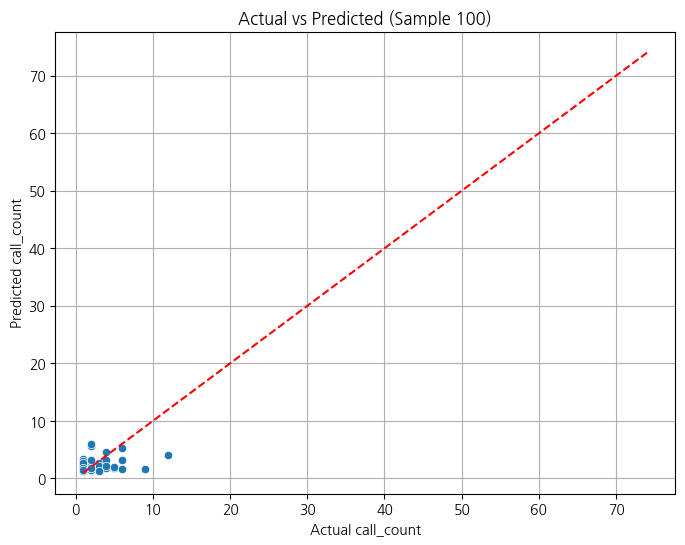

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test[:100], y=y_pred[:100])
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual call_count")
plt.ylabel("Predicted call_count")
plt.title("Actual vs Predicted (Sample 100)")
plt.grid(True)
plt.show()

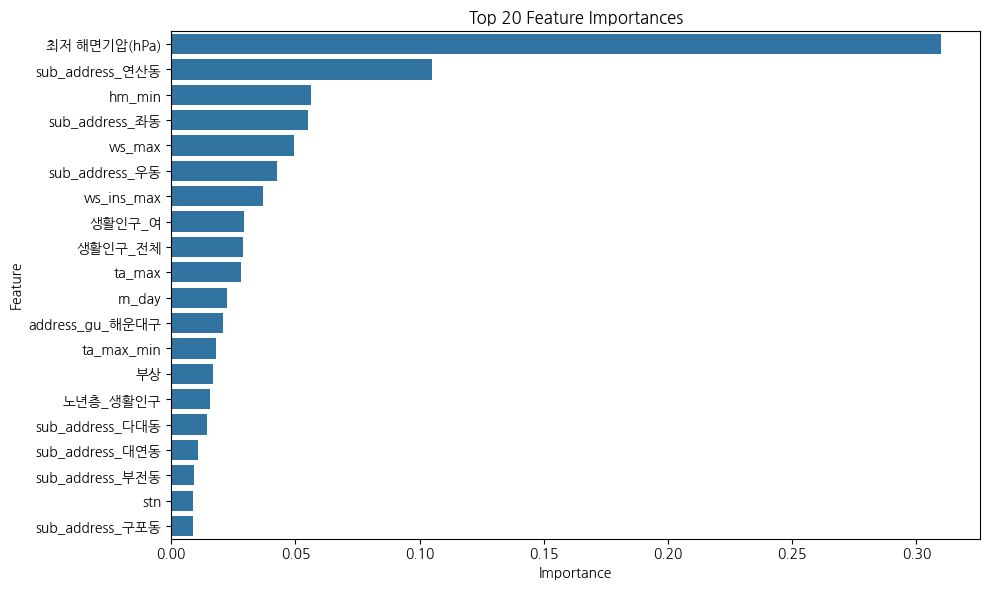

In [ ]:
importance_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": model.feature_importances_
}).sort_values(by="Importance", ascending=False).head(20)

plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=importance_df)
plt.title("Top 20 Feature Importances")
plt.tight_layout()
plt.show()

In [ ]:
path = '/content/drive/MyDrive/Epoch 공모전/2024_최종데이터.csv'
new_df = pd.read_csv(path)

In [ ]:
# 기존과 동일하게 tm_dt 칼럼 제거
new_df.drop(['tm_dt'], axis=1, inplace=True)

# 기존과 동일하게 범주형 변수 원-핫 인코딩
new_df = pd.get_dummies(new_df, columns=["address_city", "address_gu", "sub_address"])

# 누락된 열은 0으로 채우고, 순서도 기존 훈련 데이터 X_train과 맞추기
new_df = new_df.reindex(columns=X_train.columns, fill_value=0)

# StandardScaler로 스케일링
new_scaled = scaler.transform(new_df)

# 예측 수행 + 반올림 후 정수형으로 변환
predicted_call_count = model.predict(new_scaled)
predicted_call_count = np.round(predicted_call_count).astype(int)

# 예측 결과를 원본 검증 데이터에 붙이기
new_df_result = new_df.copy()
new_df_result["predicted_call_count"] = predicted_call_count

# 결과 화면에 출력 (상위 10개만 예시)
from IPython.display import display
display(new_df_result[["predicted_call_count"]].head(10))

,predicted_call_count
0,1
1,2
2,2
3,1
4,1
5,1
6,2
7,1
8,2
9,2


In [ ]:
new_df.head()

,tm,stn,ta_max,ta_min,ta_max_min,hm_min,hm_max,ws_max,ws_ins_max,rn_day,...,sub_address_초읍동,sub_address_초장동,sub_address_충무동,sub_address_칠산동,sub_address_토성동,sub_address_하단동,sub_address_학장동,sub_address_화명동,sub_address_화전동,sub_address_회동동
0,20240501,904,18.5,11.1,7.4,42.5,82.5,6.5,11.6,0.0,...,False,False,False,False,False,False,False,False,False,False
1,20240501,941,18.4,10.6,7.8,42.4,82.3,6.2,10.9,0.0,...,False,False,False,False,False,False,False,False,False,False
2,20240501,941,18.4,10.6,7.8,42.4,82.3,6.2,10.9,0.0,...,False,False,False,False,False,False,False,True,False,False
3,20240501,904,18.5,11.1,7.4,42.5,82.5,6.5,11.6,0.0,...,False,False,False,False,False,False,False,False,False,False
4,20240501,904,18.5,11.1,7.4,42.5,82.5,6.5,11.6,0.0,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
path = '/content/drive/MyDrive/Epoch 공모전/test_call119.csv'
test_df = pd.read_csv(path, encoding = 'euc-kr')

In [ ]:
test_df.head()

,TM,address_city,address_gu,sub_address,STN,ta_max,ta_min,ta_max_min,hm_min,hm_max,ws_max,ws_ins_max,rn_day,call_count
0,20240501,부산광역시,강서구,대저2동,904,18.5,11.1,7.4,42.5,82.5,6.5,11.6,0.0,NaN
1,20240501,부산광역시,강서구,생곡동,904,18.5,11.1,7.4,42.5,82.5,6.5,11.6,0.0,NaN
2,20240501,부산광역시,강서구,송정동,937,16.9,9.9,7.0,55.3,93.9,4.5,9.7,0.0,NaN
3,20240501,부산광역시,강서구,신호동,950,16.6,11.4,5.2,48.1,84.6,6.4,13.5,0.0,NaN
4,20240501,부산광역시,금정구,구서동,940,16.9,10.2,6.7,46.8,91.3,3.3,8.7,0.0,NaN


In [ ]:
test_df.drop(['call_count'], axis=1, inplace=True)

In [ ]:
test_df['call_count'] = new_df_result["predicted_call_count"]

In [ ]:
test_df.head()

,TM,address_city,address_gu,sub_address,STN,ta_max,ta_min,ta_max_min,hm_min,hm_max,ws_max,ws_ins_max,rn_day,call_count
0,20240501,부산광역시,강서구,대저2동,904,18.5,11.1,7.4,42.5,82.5,6.5,11.6,0.0,1
1,20240501,부산광역시,강서구,생곡동,904,18.5,11.1,7.4,42.5,82.5,6.5,11.6,0.0,2
2,20240501,부산광역시,강서구,송정동,937,16.9,9.9,7.0,55.3,93.9,4.5,9.7,0.0,2
3,20240501,부산광역시,강서구,신호동,950,16.6,11.4,5.2,48.1,84.6,6.4,13.5,0.0,1
4,20240501,부산광역시,금정구,구서동,940,16.9,10.2,6.7,46.8,91.3,3.3,8.7,0.0,1


In [ ]:
test_df.to_csv('/content/drive/MyDrive/Epoch 공모전/250028.csv', index=False, encoding='euc-kr')

In [ ]:
test_df

,TM,address_city,address_gu,sub_address,STN,ta_max,ta_min,ta_max_min,hm_min,hm_max,ws_max,ws_ins_max,rn_day,call_count
0,20240501,부산광역시,강서구,대저2동,904,18.5,11.1,7.4,42.5,82.5,6.5,11.6,0.0,1
1,20240501,부산광역시,강서구,생곡동,904,18.5,11.1,7.4,42.5,82.5,6.5,11.6,0.0,2
2,20240501,부산광역시,강서구,송정동,937,16.9,9.9,7.0,55.3,93.9,4.5,9.7,0.0,2
3,20240501,부산광역시,강서구,신호동,950,16.6,11.4,5.2,48.1,84.6,6.4,13.5,0.0,1
4,20240501,부산광역시,금정구,구서동,940,16.9,10.2,6.7,46.8,91.3,3.3,8.7,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9596,20241031,부산광역시,영도구,청학동,159,23.2,16.0,7.2,53.5,72.6,4.3,8.0,0.0,2
9597,20241031,부산광역시,중구,중앙동,159,23.2,16.0,7.2,53.5,72.6,4.3,8.0,0.0,2
9598,20241031,부산광역시,해운대구,반여동,937,25.4,14.8,10.6,52.9,86.6,2.6,6.1,0.0,2
9599,20241031,부산광역시,해운대구,우동,937,25.4,14.8,10.6,52.9,86.6,2.6,6.1,0.0,2
